## Team 2: Michael Kolor and Nikita Roy

In [50]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense



%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 500)

In [51]:
# Read in our constructed world cup 
df = pd.read_csv('worldcup_df.csv').drop(['Unnamed: 0'], axis = 1)
df.columns


Index(['team1', 'team2', 'score_team1', 'score_team2', 'rank_team1', 'rank_team2', 'winning_team', 'goal_difference', 'population_team1', 'GDP_per_capita_team1', 'population_team2', 'GDP_per_capita_team2', 'players_in_top_200_team1', 'age_team1', 'eur_value_team1', 'overall_average_team1', 'top_3_leagues_team1', 'nationality_team1', 'players_in_top_200_team2', 'age_team2', 'eur_value_team2', 'overall_average_team2', 'top_3_leagues_team2', 'nationality_team2', 'confederation_team1_CAF', 'confederation_team1_CONCACAF', 'confederation_team1_CONMEBOL', 'confederation_team1_OFC', 'confederation_team1_UEFA', 'confederation_team2_CAF', 'confederation_team2_CONCACAF', 'confederation_team2_CONMEBOL', 'confederation_team2_OFC', 'confederation_team2_UEFA', 'host_team1', 'rank_diff'], dtype='object')

In [52]:

X = df.drop(['team1', 'team2', 'score_team1', 'score_team2', 'goal_difference', 'winning_team', 'nationality_team1', 'nationality_team2'], axis = 1)
y = df['winning_team']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1000, random_state = 42)



In [53]:
X_train.shape

(1017, 28)

In [54]:
# Fit model
rf = RandomForestClassifier(25).fit(X_train.drop(['host_team1'], axis = 1), y_train)
print("\033[1mRandom forest model score on train set:\033[0m {0}".format(rf.score(X_train.drop(['host_team1'], axis = 1), y_train)))
print("\033[1mRandom forest model score on test set:\033[0m {0}".format(rf.score(X_test.drop(['host_team1'], axis = 1), y_test)))

Random forest model score on train set: 0.9960668633235005
Random forest model score on test set: 0.534


In [55]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.drop(['host_team1'], axis = 1).columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
rank_diff,0.129072
rank_team2,0.085056
rank_team1,0.079931
population_team1,0.079028
population_team2,0.070138
GDP_per_capita_team2,0.063370
GDP_per_capita_team1,0.062823
overall_average_team1,0.061667
eur_value_team2,0.058124
overall_average_team2,0.055806


<Container object of 27 artists>

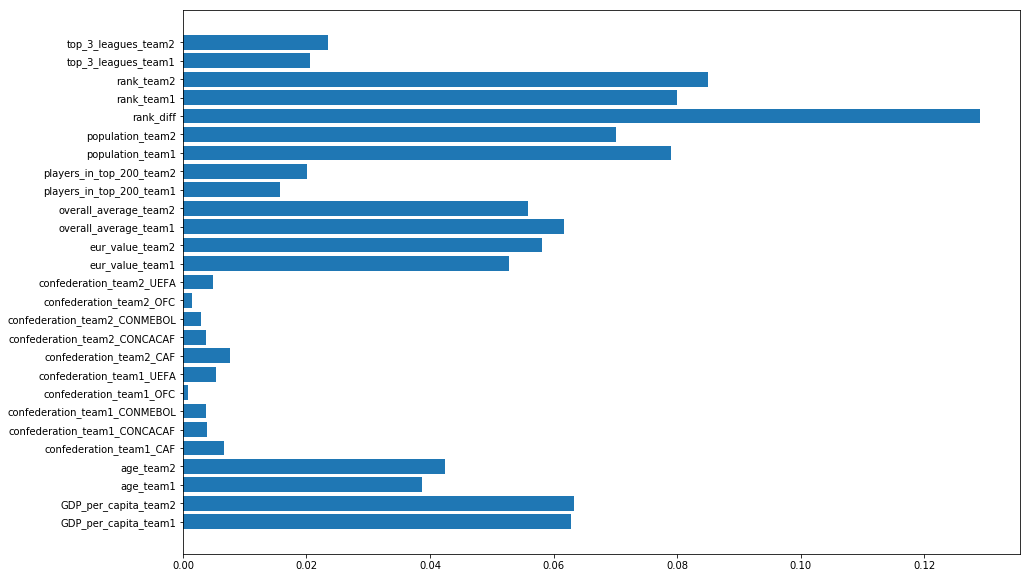

In [56]:
fig, ax = plt.subplots(1,1, figsize = (15, 10))
ax.barh( feature_importances.index, feature_importances[['importance']].values.flatten())

In [57]:
rf_X_train = X_train.drop(['host_team1','confederation_team2_UEFA', 'confederation_team2_OFC', 'confederation_team2_CONMEBOL', 'confederation_team2_CONCACAF', 'confederation_team2_CAF', 'confederation_team1_UEFA', 'confederation_team1_OFC', 'confederation_team1_CONMEBOL', 'confederation_team1_CONCACAF', 'confederation_team1_CAF'], axis = 1)
rf_X_test = X_test.drop(['host_team1','confederation_team2_UEFA', 'confederation_team2_OFC', 'confederation_team2_CONMEBOL', 'confederation_team2_CONCACAF', 'confederation_team2_CAF', 'confederation_team1_UEFA', 'confederation_team1_OFC', 'confederation_team1_CONMEBOL', 'confederation_team1_CONCACAF', 'confederation_team1_CAF'], axis = 1)


rf2 = RandomForestClassifier(25, max_depth = (5)).fit(rf_X_train, y_train)
print("\033[1mRandom forest model score on train set:\033[0m {0}".format(rf2.score(rf_X_train, y_train)))
print("\033[1mRandom forest model score on test set:\033[0m {0}".format(rf2.score(rf_X_test, y_test)))


Random forest model score on train set: 0.6637168141592921
Random forest model score on test set: 0.574


In [58]:
from sklearn.neighbors import KNeighborsClassifier


results = np.zeros((10,3))
for i,n in enumerate(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = n)
    results[i,:] = cross_val_score(model, X_train, y_train, cv=3)

results_df = pd.DataFrame(results, index=list(range(1,11)), columns= ["CV1","CV2","CV3"])
results_df['meanCV'] = np.mean(results, axis=1)

results_df

,CV1,CV2,CV3,meanCV
1,0.463127,0.442478,0.433628,0.446411
2,0.427729,0.424779,0.418879,0.423795
3,0.466077,0.477876,0.486726,0.476893
4,0.466077,0.483776,0.483776,0.477876
5,0.504425,0.489676,0.533923,0.509341
6,0.501475,0.483776,0.519174,0.501475
7,0.522124,0.513274,0.536873,0.524090
8,0.489676,0.504425,0.539823,0.511308
9,0.483776,0.486726,0.525074,0.498525
10,0.495575,0.489676,0.533923,0.506391


In [59]:
fitted_neighbors = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
print("\033[1mKNN model score on test set:\033[0m {0}".format(fitted_neighbors.score(X_test,y_test)))

KNN model score on test set: 0.494


In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [61]:
fitted_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
print("\033[1mLDA model score on test set:\033[0m {0}".format(fitted_lda.score(X_test, y_test)))


LDA model score on test set: 0.588


/Users/nikitaroy/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [62]:
# READ IN PREDICTION DATA SET
world_cup = pd.read_csv('worldcup_2018_prediction_df.csv').drop(['Unnamed: 0'], axis = 1)
world_cup.head()

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group
0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,85700000,72.478261,0.0,0.0,29.130435,216200000.0,78.478261,0.0,0,0,0,0,0,0,0,0,0,1,1,-3.0,A
1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,400500000,79.217391,0.0,1.0,27.173913,92320000.0,71.652174,4.0,0,0,1,0,0,1,0,0,0,0,0,-31.0,A
2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,905500000,85.695652,11.0,11.0,27.086957,545000000.0,82.434783,4.0,0,0,0,0,1,0,0,0,0,1,0,6.0,B
3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,232300000,76.608696,1.0,0.0,25.000000,44780000.0,62.695652,0.0,0,0,0,0,0,0,0,0,0,0,0,4.0,B
4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,811000000,84.347826,7.0,0.0,27.565217,85900000.0,72.869565,4.0,0,0,0,0,1,0,0,0,0,0,0,-29.0,C


In [63]:
world_cup_pred_df = world_cup.drop(['Group', 'team1', 'team2'], axis = 1)

In [64]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=400, learning_rate = 0.5)

adaboost.fit(X_train, y_train)

fitted_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
print("\033[1mLDA model score on test set:\033[0m {0}".format(fitted_lda.score(X_test, y_test)))


print("\033[1mAdaBoost model score on test set:\033[0m {0}".format(adaboost.score(X_test, y_test)))



LDA model score on test set: 0.588
AdaBoost model score on test set: 0.502


/Users/nikitaroy/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [65]:
predictions = rf2.predict(world_cup_pred_df.drop(['host_team1','confederation_team2_UEFA', 'confederation_team2_OFC', 'confederation_team2_CONMEBOL', 'confederation_team2_CONCACAF', 'confederation_team2_CAF', 'confederation_team1_UEFA', 'confederation_team1_OFC', 'confederation_team1_CONMEBOL', 'confederation_team1_CONCACAF', 'confederation_team1_CAF'], axis = 1))

In [66]:
predictions

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0])

In [67]:
def match_points(world_cup, predictions):

    for i in range(world_cup.shape[0]):
        print(str(world_cup.iloc[i,0]) + ' and ' +  str(world_cup.iloc[i,1]))
        if predictions[i] == 2:
            print("Winner: " + str(world_cup.iloc[i,0]) + '\n')
            world_cup.at[i,'points_team1'] = 3
            world_cup.at[i,'points_team2'] = 0
        elif predictions[i] == 1:
            print("Draw \n")
            world_cup.at[i,'points_team1'] = 1
            world_cup.at[i,'points_team2'] = 1
        elif predictions[i] == 0:
            print("Winner: " + world_cup.iloc[i,1] + '\n')
            world_cup.at[i,'points_team1'] = 0
            world_cup.at[i,'points_team2'] = 3

match_points(world_cup, predictions)



Saudi Arabia and Russia
Winner: Saudi Arabia

Uruguay and Egypt
Winner: Uruguay

Spain and Portugal
Winner: Spain

Morocco and Iran
Winner: Morocco

France and Australia
Winner: France

Peru and Denmark
Winner: Peru

Iceland and Argentina
Winner: Argentina

Nigeria and Croatia
Winner: Croatia

Switzerland and Brazil
Winner: Brazil

Serbia and Costa Rica
Winner: Serbia

Mexico and Germany
Winner: Germany

Sweden and Korea Republic
Winner: Sweden

Panama and Belgium
Winner: Belgium

Tunisia and England
Winner: England

Senegal and Poland
Winner: Poland

Japan and Colombia
Winner: Colombia

Russia and Egypt
Winner: Russia

Uruguay and Saudi Arabia
Winner: Uruguay

Portugal and Morocco
Winner: Portugal

Spain and Iran
Winner: Spain

Peru and France
Winner: France

Denmark and Australia
Winner: Denmark

Croatia and Argentina
Winner: Argentina

Nigeria and Iceland
Winner: Nigeria

Costa Rica and Brazil
Winner: Brazil

Switzerland and Serbia
Winner: Switzerland

Sweden and Germany
Winner: Ger

In [68]:
fifa_countries = pd.read_csv('fifa_countries.csv').drop(['Unnamed: 0'], axis = 1)

In [69]:
fifa_countries.head()

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0


In [70]:
fifa_countries['total_points'] = 0
for i in range(len(fifa_countries['Team'])):
    for j in range(len(world_cup['team1'])):
        if fifa_countries.iloc[i, 0] == world_cup.iloc[j, 0]:
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup.iloc[j, 31]
        elif fifa_countries.iloc[i, 0] == (world_cup.iloc[j, 1]):
            fifa_countries.iloc[i,19] = fifa_countries.iloc[i,19] + world_cup.iloc[j, 32]



In [30]:
knockout_countries = pd.DataFrame(index=range(16), columns= fifa_countries.columns)

for group, group_df in fifa_countries.groupby("Group"):
    # Store group num
    group_num = ord(group) - 65 
    
    # Sort group
    group_df = group_df.sort_values(by=["total_points","rank"], ascending=[False,True])
    
    print(group_df["rank"])
    print()
    if group_num % 2 == 0:
        # Assign the team to their proper place in the knockout countries bracket
        #print(group_data.iloc[group_num, :])
        knockout_countries.loc[group_num, :] = group_df.iloc[0, :]
        knockout_countries.loc[group_num + 8, :] = group_df.iloc[1, :]
    else:
        # Assign the team to their proper place in the knockout countries bracket
        knockout_countries.loc[group_num + 8, :] = group_df.iloc[0, :]
        knockout_countries.loc[group_num, :] = group_df.iloc[1, :]

knockout_countries_orig = knockout_countries.copy()
knockout_countries_orig

3    14
1    67
0    70
2    45
Name: rank, dtype: int64

4     4
5    10
6    41
7    37
Name: rank, dtype: int64

8      7
10    11
11    12
9     36
Name: rank, dtype: int64

12     5
14    20
15    48
13    22
Name: rank, dtype: int64

16     2
17     6
19    34
18    23
Name: rank, dtype: int64

20     1
22    24
21    15
23    57
Name: rank, dtype: int64

24     3
27    12
26    21
25    55
Name: rank, dtype: int64

28     8
29    27
30    16
31    61
Name: rank, dtype: int64



,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host,total_points
0,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.6157e+10,3.45675e+06,4,27.1304,400500000,79.2174,0,Uruguay,0,9
1,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.31132e+12,4.6572e+07,32,28.1739,905500000,85.6957,11,Spain,0,6
2,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.5825e+12,6.71186e+07,20,26.7391,811000000,84.3478,7,France,0,9
3,Croatia,D,20,Croatia,CRO,UEFA,2018-06-07,Croatia,HRV,2017,5.48492e+10,4.1257e+06,6,26.3043,431300000,79.9565,3,Croatia,0,6
4,Brazil,E,2,Brazil,BRA,CONMEBOL,2018-06-07,Brazil,BRA,2017,2.05551e+12,2.09288e+08,17,27.6087,723500000,84.3043,6,Brazil,0,9
5,Sweden,F,24,Sweden,SWE,UEFA,2018-06-07,Sweden,SWE,2017,5.3804e+11,1.00677e+07,2,28.4783,203500000,77.0435,7,Sweden,0,6
6,Belgium,G,3,Belgium,BEL,UEFA,2018-06-07,Belgium,BEL,2017,4.92681e+11,1.13721e+07,11,26.0435,734000000,83,15,Belgium,0,9
7,Senegal,H,27,Senegal,SEN,CAF,2018-06-07,Senegal,SEN,2017,1.63747e+10,1.58506e+07,3,27.1739,282200000,77.4348,9,Senegal,0,6
8,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.83827e+11,3.29382e+07,0,27.3043,85700000,72.4783,0,Saudi Arabia,0,6
9,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.17571e+11,1.02937e+07,11,27.087,545000000,82.4348,4,Portugal,0,9


In [31]:
fifa_countries

,Team,Group,rank,country_full,country_abrv,confederation,rank_date,Country,Country Code,Year,GDP,population,players_in_top_200,age,eur_value,overall_average,top_3_leagues,nationality,host,total_points
0,Russia,A,70,Russia,RUS,UEFA,2018-06-07,Russia,RUS,2017,1.577520e+12,144495044.0,0.0,29.130435,216200000,78.478261,0.0,Russia,1,3.0
1,Saudi Arabia,A,67,Saudi Arabia,KSA,AFC,2018-06-07,Saudi Arabia,SAU,2017,6.838270e+11,32938213.0,0.0,27.304348,85700000,72.478261,0.0,Saudi Arabia,0,6.0
2,Egypt,A,45,Egypt,EGY,CAF,2018-06-07,Egypt,EGY,2017,2.353690e+11,97553151.0,1.0,27.173913,92320000,71.652174,4.0,Egypt,0,0.0
3,Uruguay,A,14,Uruguay,URU,CONMEBOL,2018-06-07,Uruguay,URY,2017,5.615697e+10,3456750.0,4.0,27.130435,400500000,79.217391,0.0,Uruguay,0,9.0
4,Portugal,B,4,Portugal,POR,UEFA,2018-06-07,Portugal,PRT,2017,2.175710e+11,10293718.0,11.0,27.086957,545000000,82.434783,4.0,Portugal,0,9.0
5,Spain,B,10,Spain,ESP,UEFA,2018-06-07,Spain,ESP,2017,1.311320e+12,46572028.0,32.0,28.173913,905500000,85.695652,11.0,Spain,0,6.0
6,Morocco,B,41,Morocco,MAR,CAF,2018-06-07,Morocco,MAR,2017,1.091390e+11,35739580.0,1.0,26.695652,232300000,76.608696,1.0,Morocco,0,3.0
7,Iran,B,37,Iran,IRN,AFC,2018-06-07,Iran,IRN,2017,4.395140e+11,81162788.0,0.0,25.000000,44780000,62.695652,0.0,Iran,0,0.0
8,France,C,7,France,FRA,UEFA,2018-06-07,France,FRA,2017,2.582500e+12,67118648.0,20.0,26.739130,811000000,84.347826,7.0,France,0,9.0
9,Australia,C,36,Australia,AUS,AFC,2018-06-07,Australia,AUS,2017,1.323420e+12,24598933.0,0.0,27.565217,85900000,72.869565,4.0,Australia,0,0.0


In [32]:
world_cup.head()

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2
0,Saudi Arabia,Russia,67.0,70.0,32938213.0,20760.901631,144495044.0,10917.467868,0.0,27.304348,85700000,72.478261,0.0,0.0,29.130435,216200000.0,78.478261,0.0,0,0,0,0,0,0,0,0,0,1,1,-3.0,A,3.0,0.0
1,Uruguay,Egypt,14.0,45.0,3456750.0,16245.598368,97553151.0,2412.725756,4.0,27.130435,400500000,79.217391,0.0,1.0,27.173913,92320000.0,71.652174,4.0,0,0,1,0,0,1,0,0,0,0,0,-31.0,A,3.0,0.0
2,Spain,Portugal,10.0,4.0,46572028.0,28156.815503,10293718.0,21136.289143,32.0,28.173913,905500000,85.695652,11.0,11.0,27.086957,545000000.0,82.434783,4.0,0,0,0,0,1,0,0,0,0,1,0,6.0,B,0.0,3.0
3,Morocco,Iran,41.0,37.0,35739580.0,3053.729227,81162788.0,5415.215653,1.0,26.695652,232300000,76.608696,1.0,0.0,25.000000,44780000.0,62.695652,0.0,0,0,0,0,0,0,0,0,0,0,0,4.0,B,3.0,0.0
4,France,Australia,7.0,36.0,67118648.0,38476.639160,24598933.0,53799.894491,20.0,26.739130,811000000,84.347826,7.0,0.0,27.565217,85900000.0,72.869565,4.0,0,0,0,0,1,0,0,0,0,0,0,-29.0,C,3.0,0.0


In [49]:
knockout_countries = knockout_countries_orig.copy()

#matches = pd.DataFrame(index=range(8), columns=wc_predictors.columns)
team1_columns = ["rank_team1", "population_team1", 'GDP_per_capita_team1', 
        'players_in_top_200_team1', 'age_team1', 'eur_value_team1', 
        'overall_average_team1', 'top_3_leagues_team1', 'confederation_team1_CAF',
        'confederation_team1_CONCACAF',
        'confederation_team1_CONMEBOL', 'confederation_team1_OFC',
        'confederation_team1_UEFA']

team2_columns = ["rank_team2", "population_team2", 'GDP_per_capita_team2', 
        'players_in_top_200_team2', 'age_team2', 'eur_value_team2', 
        'overall_average_team2', 'top_3_leagues_team2', 'confederation_team2_CAF',
        'confederation_team2_CONCACAF',
        'confederation_team2_CONMEBOL', 'confederation_team2_OFC',
        'confederation_team2_UEFA']

for num_matches in [2, 4, 8, 16]:
    if(num_matches) == 16:
        print(matches)
    # Initialize matches
    matches = pd.DataFrame(index=range(int(16/num_matches)), columns=world_cup.columns)
    matches["knockout_index1"] = np.nan
    matches["knockout_index2"] = np.nan
    
    for bracket_pos in knockout_countries.index:
        #print(int(bracket_pos/num_matches))
        #print(bracket_pos)
        match_num = int(bracket_pos/num_matches)
        ###########################################
        # Set rank_team1
        team_name = knockout_countries.loc[bracket_pos, ["country_full"]].values
        #print(team_name)
        # Get Team's Data
        team_df = world_cup[world_cup["team1"] == team_name[0]].head(1)
        
        # If only team 2
        if(len(team_df) == 0):
            team_df = team_df = world_cup[world_cup["team2"] == team_name[0]].head(1)
            #
            use_team2_columns = True
        else:
            use_team2_columns = False
    
            
        #print("\033[1mmatch {0}\033[0m".format(match_num))
        
        # Team 1
        if bracket_pos % num_matches < num_matches/2:
            
            #print("Team 1")
            #print(matches.loc[match_num, team1_columns])
            
            if(use_team2_columns):
                
                #print(team_df.loc[0, team2_columns])
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team2_columns].values
                #print(matches.loc[match_num, team1_columns])
            else:
                #print(team_df.loc[0, team1_columns])
                matches.loc[match_num, "knockout_index1"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team1_columns] = team_df.loc[0, team1_columns].values
            
        # Team 2
        else:
            #print("Team 2")
            if(use_team2_columns):
                #print(team_df.loc[0, team2_columns])
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team2_columns].values
            else:
                #print(team_df.loc[0, team1_columns])
                matches.loc[match_num, "knockout_index2"] = bracket_pos
                team_df = team_df.reset_index(drop=True)
                matches.loc[match_num, team2_columns] = team_df.loc[0, team1_columns].values
                #print()

        
    #HOST TEam1
    matches["host_team1"] = 0
    matches.loc[matches[matches["rank_team1"] == 70]["host_team1"].index, ["host_team1"]] = 1

    # Rank Difference
    matches["rank_diff"] = matches["rank_team1"] - matches["rank_team2"]
    #
    # RUN PREDICTIONSSSS
    # round of 16
    #print(matches)
    if(num_matches) == 2:
        print("\033[1m\n\nROUND OF 16:\n\n\033[0m")
    elif(num_matches) == 4:
        print("\033[1m\n\nQUARTERFINALS:\n\n\033[0m")
    elif(num_matches) == 8:
        print("\033[1mSEMIS:\033[0m")
    else:
        print("\033[1mFINALS:\033[0m")
        
    # Run results
    round_predictors = matches.copy().drop(["knockout_index1", "knockout_index2"], axis = 1)
   
    #print(round16_predictors["predicted_goal_difference"])

    for match in range(len(matches[['rank_team1']])):
        print()
        print(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0])
        print(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0])
        #print("Goal Difference: {0}".format(predictions[match]))

        if predictions[match] == 2:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
            knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index2"]], axis=0)

        elif predictions[match] == 1:
            # Settle ties with higher team
            if round_predictors.loc[match, "rank_diff"] > 0:
                print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
                knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index1"]])
            else:
                print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index1"], ["Team"]].values[0]))
                knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index2"]])
        else:
            print("\033[1mWinner: {0}\033[0m".format(knockout_countries.loc[matches.loc[match, "knockout_index2"], ["Team"]].values[0]))
            knockout_countries = knockout_countries.drop([matches.loc[match, "knockout_index1"]], axis = 0)
        
        
        
                    
            
matches



ROUND OF 16:



Uruguay
Spain
Winner: Uruguay

France
Croatia
Winner: France

Brazil
Sweden
Winner: Sweden

Belgium
Senegal
Winner: Belgium

Saudi Arabia
Portugal
Winner: Saudi Arabia

Peru
Argentina
Winner: Argentina

Switzerland
Germany
Winner: Germany

England
Poland
Winner: Poland


QUARTERFINALS:



Uruguay
France
Winner: Uruguay

Sweden
Belgium
Winner: Sweden

Saudi Arabia
Argentina
Winner: Argentina

Germany
Poland
Winner: Germany
SEMIS:

Uruguay
Sweden
Winner: Uruguay

Argentina
Germany
Winner: Argentina
  team1 team2 rank_team1 rank_team2 population_team1 GDP_per_capita_team1 population_team2 GDP_per_capita_team2 players_in_top_200_team1 age_team1 eur_value_team1 overall_average_team1 top_3_leagues_team1 players_in_top_200_team2 age_team2 eur_value_team2 overall_average_team2 top_3_leagues_team2 confederation_team1_CAF confederation_team1_CONCACAF confederation_team1_CONMEBOL confederation_team1_OFC confederation_team1_UEFA confederation_team2_CAF confederation_team2_CONCACA

,team1,team2,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff,Group,points_team1,points_team2,knockout_index1,knockout_index2
0,NaN,NaN,14,5,3.45675e+06,16245.6,4.4271e+07,14402,4,27.1304,400500000,79.2174,0,16,28.6957,7.415e+08,83.7826,4,0,0,1,0,0,0,0,1,0,0,0,9,NaN,NaN,NaN,0.0,11.0


In [ ]:
matches

In [ ]:
knockout_countries

In [ ]:
matches.head()

In [ ]:
matches

In [73]:
X_train

,rank_team1,rank_team2,population_team1,GDP_per_capita_team1,population_team2,GDP_per_capita_team2,players_in_top_200_team1,age_team1,eur_value_team1,overall_average_team1,top_3_leagues_team1,players_in_top_200_team2,age_team2,eur_value_team2,overall_average_team2,top_3_leagues_team2,confederation_team1_CAF,confederation_team1_CONCACAF,confederation_team1_CONMEBOL,confederation_team1_OFC,confederation_team1_UEFA,confederation_team2_CAF,confederation_team2_CONCACAF,confederation_team2_CONMEBOL,confederation_team2_OFC,confederation_team2_UEFA,host_team1,rank_diff
1107,130.0,205.0,1.315790e+06,17736.802696,34408.0,0.000000,0.0,27.000000,5730000.0,55.173913,0.0,0.0,30.000000,725000.0,51.217391,0.0,0,0,0,0,1,0,0,0,0,1,0,-75.0
299,135.0,96.0,1.319011e+06,3047.946756,17573607.0,362.657544,0.0,20.000000,575000.0,50.565217,0.0,0.0,0.000000,0.0,0.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,39.0
1272,16.0,76.0,1.291633e+08,8902.840154,2890299.0,5109.552649,0.0,27.913043,264000000.0,78.217391,2.0,0.0,28.304348,44860000.0,69.130435,3.0,0,1,0,0,0,0,1,0,0,0,1,-60.0
1793,38.0,8.0,7.075991e+06,8031.598442,67118648.0,38476.639160,0.0,28.391304,32000000.0,69.956522,0.0,20.0,26.739130,811000000.0,84.347826,7.0,0,0,0,0,1,0,0,0,0,1,0,30.0
25,188.0,182.0,7.873860e+05,2615.310220,161200886.0,1210.160842,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,6.0
1874,33.0,63.0,9.781127e+06,14224.843415,144495044.0,10917.467868,0.0,27.565217,44125000.0,71.695652,3.0,0.0,29.130435,216200000.0,78.478261,0.0,0,0,0,0,1,0,0,0,0,1,0,-30.0
714,178.0,52.0,4.553560e+05,24770.806573,2065042.0,21650.212755,0.0,22.750000,1240000.0,51.608696,0.0,2.0,27.956522,201775000.0,74.913043,2.0,0,0,0,0,1,0,0,0,0,1,0,126.0
1018,6.0,25.0,1.790975e+07,13960.884108,31773839.0,6031.376945,2.0,29.173913,278100000.0,78.521739,4.0,0.0,26.043478,60700000.0,70.826087,2.0,0,0,1,0,0,0,0,1,0,0,0,-19.0
193,103.0,144.0,9.159302e+06,4096.099275,5851479.0,8452.443641,0.0,0.000000,0.0,0.000000,0.0,0.0,22.800000,3020000.0,52.739130,0.0,0,0,0,0,0,0,0,0,0,0,0,-41.0
440,173.0,180.0,1.309054e+09,1606.037667,28656282.0,747.160462,0.0,26.478261,0.0,59.391304,0.0,0.0,0.000000,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,-7.0


In [78]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Baseline: Logistic Regression Classification Model")
print("Training score: ", (score))
print("Test score: ", (score2))

print()
print('Random Forest Classifier (Unlimited Depth)')
rf = RandomForestClassifier(25).fit(X_train.drop(['host_team1'], axis = 1), y_train)
print("Training score: {0}".format(rf.score(X_train.drop(['host_team1'], axis = 1), y_train)))
print("Test score: {0}".format(rf.score(X_test.drop(['host_team1'], axis = 1), y_test)))


print()
print('Random Forest Classifier (Depth = 5)')

rf = RandomForestClassifier(25, max_depth = 5).fit(X_train.drop(['host_team1'], axis = 1), y_train)
print("Training score: {0}".format(rf.score(X_train.drop(['host_team1'], axis = 1), y_train)))
print("Test score: {0}".format(rf.score(X_test.drop(['host_team1'], axis = 1), y_test)))




print()
print('Linear Discriminant Analysis')
print("Training score: {0}".format(fitted_lda.score(X_train, y_train)))


print("Test score: {0}".format(fitted_lda.score(X_test, y_test)))


print()
print('Adaboost Model')
print("Training score: {0}".format(adaboost.score(X_train, y_train)))


print("Test score: {0}".format(adaboost.score(X_test, y_test)))


print()
print('Random Forest Classifier (Depth = 5) - FINAL MODEL')
rf2 = RandomForestClassifier(25, max_depth = (5)).fit(rf_X_train, y_train)
print("Training score: {0}".format(rf2.score(rf_X_train, y_train)))
print("Test score: {0}".format(rf2.score(rf_X_test, y_test)))

Baseline: Logistic Regression Classification Model
Training score:  0.53883972468
Test score:  0.544

Random Forest Classifier (Unlimited Depth)
Training score: 0.9960668633235005
Test score: 0.536

Random Forest Classifier (Depth = 5)
Training score: 0.6637168141592921
Test score: 0.568

Linear Discriminant Analysis
Training score: 0.6017699115044248
Test score: 0.588

Adaboost Model
Training score: 0.9685349065880039
Test score: 0.502

Random Forest Classifier (Depth = 5) - FINAL MODEL
Training score: 0.6627335299901671
Test score: 0.582
